Using:
    https://gist.github.com/EdwardJRoss/86b31848a7951411de56f10f55e9de4e
    https://forums.fast.ai/t/character-level-language-model/31379
    
Lesson 3 RNN

Offline steps:

1. Combine scraped files
2. Use Notepad++ to convert encoding to UTF8
3. sort out carriage returns etc.
4. End up with rawest_just_eat.csv 

Long story:
1. Get raw scraped files
2. Open them in Notepad++ and choose Encode in UTF8
3. This didn't work for #7 which had to be saved as unicode text and then saved as UTF 8
4. Then knit them together in Python


In [248]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [249]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [250]:
df = pd.read_csv('/home/trpb2/data/takeaway/rawest_just_eat.csv')

In [251]:
my_dir = '/home/trpb2/takeaways/data/scraped/'

In [252]:
df_temp = pd.concat([pd.read_csv(my_dir+f) for f in os.listdir(my_dir)], ignore_index = True)

In [253]:
df = df_temp[['Name','Cuisines']]

In [254]:
df = pd.concat([df['Name'], df['Cuisines'].str.split(', ', expand=True)], axis=1)

In [255]:
df.columns = ['text','label','label2','label3']

In [259]:
df[df.label2.isna()]

,text,label,label2,label3


In [260]:
df.dropna(thresh=3, inplace=True)

In [261]:
df['text'] = df.text.str.lower()

## Character Set

What letters outside of ASCII are in the names?


In [263]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.text))) if _ not in string.ascii_letters)
foreign_chars.most_common()


[(' ', 84450),
 ("'", 58978),
 (',', 31157),
 ('"', 6346),
 ('&', 2867),
 ('-', 2409),
 ('®', 579),
 ('(', 366),
 (')', 366),
 ('1', 274),
 ('2', 273),
 ('’', 250),
 ('.', 215),
 ('@', 195),
 ('4', 141),
 ('3', 119),
 ('0', 119),
 ('8', 84),
 ('6', 81),
 ('9', 80),
 ('7', 79),
 ('5', 73),
 ('!', 68),
 ('é', 28),
 ('`', 23),
 ('´', 19),
 ('/', 18),
 ('#', 7),
 ('‘', 7),
 ('+', 6),
 (':', 4),
 ('?', 4),
 ('–', 3),
 ('*', 3),
 ('ó', 2),
 ('%', 2),
 ('ê', 2),
 ('ö', 2),
 ('è', 2),
 ('[', 1),
 ('á', 1),
 ('\\', 1),
 ('ä', 1),
 ('~', 1),
 ('ü', 1),
 ('°', 1),
 (']', 1)]

In [264]:
df['ascii_name'] = df.text.apply(lambda x: unidecode(str(x)))
df[df.text != df.ascii_name]

,text,label,label2,label3,ascii_name
66,subway® - 7 wellmeadow street,Sandwiches,Lunch,Halal,subway(r) - 7 wellmeadow street
103,café bagel,Bagels,Vegan,None,cafe bagel
110,ollie’s kebab ye / fish&chips,Kebab,Fish & Chips,None,ollie's kebab ye / fish&chips
121,subway® gravesend high street,Subways,Sandwiches,None,subway(r) gravesend high street
129,hennie penny’s chicken,Chicken,American,None,hennie penny's chicken
213,subway® - london road,Sandwiches,Halal,None,subway(r) - london road
241,subway® - charon way,Sandwiches,Lunch,None,subway(r) - charon way
336,subway® wakefield drive thru,Subways,Sandwiches,None,subway(r) wakefield drive thru
387,subway® - coventry high street,Sandwiches,Lunch,None,subway(r) - coventry high street
392,subway®- 9/11 high street,Sandwiches,Lunch,None,subway(r)- 9/11 high street


In [265]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.ascii_name))) if _ not in string.ascii_letters)
foreign_chars.most_common()

[(' ', 84450),
 ("'", 58728),
 (',', 31157),
 ('"', 6872),
 ('&', 2867),
 ('-', 2412),
 ('(', 945),
 (')', 945),
 ('1', 274),
 ('2', 273),
 ('.', 215),
 ('@', 195),
 ('4', 141),
 ('3', 119),
 ('0', 119),
 ('8', 84),
 ('6', 81),
 ('9', 80),
 ('7', 79),
 ('5', 73),
 ('!', 68),
 ('`', 23),
 ('/', 18),
 ('#', 7),
 ('+', 6),
 (':', 4),
 ('?', 4),
 ('*', 3),
 ('%', 2),
 ('[', 1),
 ('\\', 1),
 ('~', 1),
 (']', 1)]

In [266]:
df['ascii_name_fix'] = df.ascii_name.str.replace('`',"'")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('~'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(']'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('['," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('\\'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('%'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('*'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(':'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('+'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('&'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('/'," ")
suss_chars = ['`',']','%','&']
df[df.ascii_name_fix.str.contains('|'.join(suss_chars))]

,text,label,label2,label3,ascii_name,ascii_name_fix


In [267]:
df = df.drop(columns=['text', 'ascii_name'])

In [269]:
df

,label,label2,label3,ascii_name_fix
0,Chicken,Pizza,Halal,southern fried chicken and pizza
1,Pizza,Salads,None,pizza hut delivery - cambuslang
3,Indian,Bangladeshi,Halal,the curry garden
4,Kebab,Turkish,None,j and d kebab
5,Chicken,Peri Peri,None,pepe's piri piri
6,Indian,Curry,None,maharani indian cuisine
7,Caribbean,Fast Food,None,sweet jamrock
8,Indian,Curry,None,zaafran
9,Kebab,Indian,Halal,omar sharifs
10,Pizza,Chicken,None,pizza home


## Get rid of some key chains
we just take their most common tag in each column

In [270]:
hard_coded_chains = ["asda kitchen", "basilico", "bella italia", "birdbox", "blazing bird", "burger king", "caspian pizza", "chicken cottage", "chiquito", "firezza", "frankie & benny's", "gbk", "greggs", "harvester", "itsu", "kfc", "kick ass", "las iguanas", "papa john", "pizza hut", "stack & grill", "stacks", "subway", "tim horton", "toby carvery", "tortilla -", "turtle bay", "wimpy", "yo!"]
for chain in hard_coded_chains:
    to_drop = df[df.ascii_name_fix.str.contains(chain, regex= True, na=False)]
    df = df[~df.ascii_name_fix.isin(to_drop.ascii_name_fix.tolist())]
    to_append = {'ascii_name_fix' : chain, 'trim':chain, 'trim2':chain}
    labels = ['label','label2','label3']
    for l in labels:
        mode_l = to_drop[l].mode()
        if len(mode_l) > 0:
            to_append[l] = mode_l[0]
        else:
            #to_append[l] = np.nan
            to_append[l] = 'None'
    df = df.append(to_append, ignore_index=True)
    
# warning because of brackets in gbk

In [271]:
df['trim'] = df['ascii_name_fix'].str.split(r' - ').str.get(0)
df['trim2'] = df['ascii_name_fix'].str.split(" \(").str.get(0)

In [272]:
# name_classes1 = df.groupby(df.trim).size().reset_index(name='count')
# name_classes2 = df.groupby(df.trim2).size().reset_index(name='count')

In [273]:
sus_chains = df[(df['trim']!=df['ascii_name_fix'])|(df['trim2']!=df['ascii_name_fix'])]
print([sus_chains[col].str.len().min() for col in ['trim','trim2']])


[2, 3]


In [274]:
sus_chains = df[(df['trim']!=df['ascii_name_fix'])]['trim'].to_list()
sus_chains2 = df[(df['trim2']!=df['ascii_name_fix'])]['trim2'].to_list()
sus_chains_list = sus_chains + sus_chains2
len(sus_chains)

834

In [275]:
my_count = Counter(sus_chains_list)
counts = pd.DataFrame(my_count.most_common(), columns=['ascii_name_fix', 'count'])

In [276]:
counts[counts['count']>1]

,ascii_name_fix,count
0,frankie and benny's,79
1,harry ramsden,41
2,favorite chicken and ribs,34
3,roosters piri piri,31
4,the ice cream hub,28
5,wenzel's,27
6,cluxxx it,24
7,stack and grill by cafe rouge,22
8,pieminister,20
9,dixy chicken,20


In [277]:
# leave at 10 to catch chains not duplicates - need to review by eye
# chain_dupe1 = name_classes1.loc[name_classes1['count']> 10,['trim']].trim.to_list()
# chain_dupe2 = name_classes2.loc[name_classes2['count']> 10,['trim2']].trim2.to_list()
# to_trim_down = list(set().union(chain_dupe1,chain_dupe2))
to_trim_down = counts.loc[counts['count']> 1,['ascii_name_fix']].ascii_name_fix.to_list()

In [278]:
to_trim_down

["frankie  and  benny's",
 'harry ramsden',
 'favorite chicken  and  ribs',
 'roosters piri piri',
 'the ice cream hub',
 "wenzel's",
 'cluxxx it',
 'stack  and  grill by cafe rouge',
 'pieminister',
 'dixy chicken',
 "kaspa's",
 'creams',
 "big john's",
 'chopstix noodle bar',
 'coast to coast',
 'little dessert shop',
 'wok  and  go',
 'tops pizza',
 "pepe's piri piri",
 "nando's",
 'king of wings',
 "miss millie's fried chicken",
 'wrapchic',
 'tikka twins',
 'giraffe',
 'chop  and  wok',
 "cornstar taco's",
 'oodles chinese',
 "auntie anne's",
 'sprinkles gelato',
 'bella napoli pizzeria',
 'marco  and  carl',
 "drake's fish  and  chips",
 'ultimate cafe',
 'deep blue',
 "ed's easy diner",
 'burrito kitchen',
 'zabardast',
 'the pizza room',
 "garfunkel's",
 'clucks burger',
 'the urban chocolatier',
 'aspendos',
 'oriental express',
 'delightful desserts',
 'buddies usa',
 "joe's kitchen",
 'cream curls',
 'the good earth express',
 'fast break',
 'streetcube',
 'mylahore',
 'burg

In [279]:
# for chain in chain_dupe1:
#     to_drop = df[df['trim'] == chain]
#     df = df[df['trim'] != chain] 
#     to_append = {'text' : chain, 'trim':chain, 'trim2':chain}
#     labels = ['label','label2','label3']
#     for l in labels:
#         mode_l = to_drop[l].mode()
#         if len(mode_l) > 0:
#             to_append[l] = mode_l[0]
#         else:
#             to_append[l] = np.nan
#     df = df.append(to_append, ignore_index=True)
    

In [280]:
# for chain in chain_dupe2:
#     to_drop = df[df['trim2'] == chain]
#     df = df[df['trim2'] != chain] 
#     to_append = {'text' : chain, 'trim':chain, 'trim2':chain}
#     labels = ['label','label2','label3']
#     for l in labels:
#         mode_l = to_drop[l].mode()
#         if len(mode_l) > 0:
#             to_append[l] = mode_l[0]
#         else:
#             to_append[l] = np.nan
#     df = df.append(to_append, ignore_index=True)

In [281]:
for chain in to_trim_down:
    to_drop = df[df.ascii_name_fix.str.contains(chain, regex= True, na=False)]
    df = df[~df.ascii_name_fix.isin(to_drop.ascii_name_fix.tolist())]
    to_append = {'ascii_name_fix' : chain, 'trim':chain, 'trim2':chain}
    labels = ['label','label2','label3']
    for l in labels:
        mode_l = to_drop[l].mode()
        if len(mode_l) > 0:
            to_append[l] = mode_l[0]
        else:
            to_append[l] = 'None'
    df = df.append(to_append, ignore_index=True)
    
# warning because of brackets in gbk

In [282]:
df = df.drop(columns=['trim', 'trim2', 'label3'])

In [283]:
df[df.ascii_name_fix.str.contains("mamas", regex= True, na=False)]

,label,label2,ascii_name_fix
3192,Parmesans,Kebab,mamas pizza
3609,Parmesans,Kebab,mamas pizzeria
7153,Burgers,Pizza,big mamas
14049,Burgers,Desserts,mamas
16396,Pizza,Italian,mamas pizza and pasta


## Check for duplicates


These are remaining duplicates with different classes

In [153]:
name_classes = df.\
  groupby('ascii_name_fix').size().reset_index(name='counts')

Use similar logic to removing chains to take the most popular labels

In [154]:
to_dedupe = name_classes[name_classes['counts'] > 1]['ascii_name_fix'].to_list()

In [155]:
to_dedupe

['1st class pizza',
 '2-4-1 pizza',
 '241 pizza',
 '3 for 10 pizza',
 '500 degrees pizzeria',
 '7 spices',
 'a mano',
 'a taste of india',
 'a touch of spice',
 "a'la pizza  and  grill",
 'abbey fish bar',
 'abduls',
 'aburi japanese restaurant',
 'acropolis',
 "adam's pizza",
 "adam's pizzeria",
 'adams',
 'afc',
 'agra',
 'akash',
 'akash restaurant',
 'akash tandoori',
 'akash tandoori restaurant',
 'amaretto ristorante pizzeria',
 'american fried chicken',
 'american grill peri peri',
 'american pizza',
 'american pizza house',
 'american slice',
 'amigo',
 'amigo pizza',
 "amigo's",
 "amigo's pizza",
 'amigos',
 'amigos pizza',
 'amore pizza',
 'amran tandoori',
 "angelo's fish bar",
 'anglo pizza',
 'anise',
 'antep pizza',
 'antonios pizza',
 'apna lahore',
 'ariana restaurant',
 'aroma',
 'aroma indian takeaway',
 'aroma kitchen',
 'aroma pizza',
 'aroma spice',
 'asha',
 'ashiana',
 'ashoka',
 'asia villa',
 'asian tandoori',
 'asiana',
 'athena',
 'atlantic fish bar',
 'atlan

In [156]:
for chain in to_dedupe:
    to_drop = df[df['ascii_name_fix'] == chain]
    df = df[df['ascii_name_fix'] != chain]
    to_append = {'ascii_name_fix' : chain}
    labels = ['label','label2']
    for l in labels:
        mode_l = to_drop[l].mode()
        if len(mode_l) > 0:
            to_append[l] = mode_l[0]
        else:
            to_append[l] = None
    df = df.append(to_append, ignore_index=True)

In [157]:
df[['label','label2']] = df[['label','label2']].astype(str)

check for duplicate name label combinations

In [158]:
counts = df.assign(n=1).groupby(['ascii_name_fix', 'label', 'label2']).count().sort_values('n', ascending=False)
counts.tail(n=20)

,,,n
ascii_name_fix,label,label2,
grill'ish,Grill,Chicken,1
grillicious mediterranean,Italian,Pizza,1
grilliciouse,Grill,Kebab,1
grillish,Grill,Chicken,1
grillshack,Grill,Burgers,1
grimsby tandoori,Indian,Curry,1
grillzilla,Peri Peri,Kebab,1
grillzbase ltd,Grill,BBQ,1
grillz,Grill,Chicken,1


In [159]:
df.to_csv('/home/trpb2/takeaways/data/20_01_2020_just_eat_words.csv', index=False)


### Distribution by Cuisine

The dataset is very unbalanced.


In [175]:
label_count = df.groupby('label').ascii_name_fix.count().sort_values(ascending=False)

In [176]:
len(label_count)

130

In [177]:
label_count[100:150]

label
Pub Food          2
Gluten Free       2
Kurdish           2
Frozen Yogurt     2
Colombian         2
Latin American    2
Bulgarian         2
Hungarian         2
Argentinian       2
Retro Sweets      2
Baguettes         2
Biryani           1
Pancakes          1
Street Food       1
Roast Dinners     1
Organic           1
Peruvian          1
Kosher            1
West African      1
Punjabi           1
Iraqi             1
Groceries         1
South African     1
Ghanaian          1
German            1
Scottish          1
Singapore         1
Soup              1
Continental       1
Salt & Pepper     1
Name: ascii_name_fix, dtype: int64

In [178]:
label_count2 = df.groupby('label2').ascii_name_fix.count().sort_values(ascending=False)

In [179]:
len(label_count2)

142

In [180]:
label_count2[100:150]

label2
French              6
Kurdish             6
Hot Dogs            6
Punjabi             6
Pub Food            5
Gourmet Burgers     5
Romanian            5
Syrian              4
Brazilian food      4
Alcohol             4
Polish              4
Soup                3
Authentic Pizza     3
Baguettes           2
Egyptian            2
North African       2
Scottish            2
Argentinian         2
West African        2
Pies                2
Ethiopian           2
Tex-Mex             1
Ukrainian           1
Belgian Waffles     1
Best Bites          1
Organic             1
Taiwanese           1
Bulgarian           1
Subways             1
Danish              1
South African       1
Sizzlers            1
Filipino            1
Singapore           1
German              1
Russian             1
Rotisserie          1
Retro Sweets        1
Kosher              1
Low-Carb            1
Peruvian            1
*NEW*               1
Name: ascii_name_fix, dtype: int64

In [181]:
df2 = pd.DataFrame(np.sort(df[['label', 'label2']], axis=1), index=df.index)
df2.columns = ['label', 'label2']
combos = df2.groupby(['label', 'label2']).size().reset_index(name='counts')

In [182]:
combos

,label,label2,counts
0,*NEW*,Desserts,1
1,Afghan,Asian,1
2,Afghan,BBQ,1
3,Afghan,Curry,1
4,Afghan,Greek,1
5,Afghan,Grill,3
6,Afghan,Halal,1
7,Afghan,Indian,6
8,Afghan,Kebab,3
9,Afghan,Middle Eastern,3


In [183]:
combos.to_csv('/home/trpb2/takeaways/data/18_03_2020_combos.csv', index=False)

In [184]:
combos_10 = combos[combos['counts']>10]
combos[combos['label']=='Indian'],combos[combos['label2']=='Indian']

(      label               label2  counts
 858  Indian               Indian      12
 859  Indian  Indo-Chinese Fusion       6
 860  Indian              Italian      54
 861  Indian        Italian Pizza       2
 862  Indian             Japanese       1
 863  Indian                Kebab     191
 864  Indian                Lunch       4
 865  Indian        Mediterranean       1
 866  Indian              Mexican       4
 867  Indian       Middle Eastern       4
 868  Indian           Milkshakes       3
 869  Indian             Nepalese     105
 870  Indian             Oriental       3
 871  Indian            Pakistani      63
 872  Indian                Pasta       1
 873  Indian            Peri Peri      11
 874  Indian                Pizza     274
 875  Indian           Portuguese       1
 876  Indian             Pub Food       1
 877  Indian              Punjabi       7
 878  Indian           Sandwiches       1
 879  Indian              Seafood       5
 880  Indian        South African 

## Crafting the mappings

Here we generate the mappings

In [210]:
#remove s on burger for scannign later

dead_certain = {'Curry':'Indian', 'Bangladeshi':'Indian', 'Nepalese':'Indian', 'Pakistani':'Indian', 'South Indian':'Indian', 'Sri Lankan':'Indian',
                'Ice Cream':'Desserts', 'Cakes':'Desserts', 'Milkshakes':'Desserts', 'Crepes':'Desserts', 'Waffles':'Desserts',
                'Italian':'Pizza', 'Italian Pizza':'Pizza',
                'Noodles':'Chinese', 'Oriental':'Chinese', 'Cantonese':'Chinese', 'Dim Sum':'Chinese',

                #'Turkish':'MedMid', 'Lebanese':'MedMid', 'Mediterranean':'MedMid', 'Greek':'MedMid', 'Middle Eastern':'MedMid', 'Persian':'MedMid', 'Afghan':'MedMid',
                #'African':'AfroCarib','Caribbean':'AfroCarib', 'Jamaican':'AfroCarib', 'Nigerian':'AfroCarib',
                'Gourmet Burgers':'Burger', 'Burgers':'Burger',
                'Café':'Sand/Caf/Bake', 'Sandwiches':'Sand/Caf/Bake', 'Wraps':'Sand/Caf/Bake', 'Bagels':'Sand/Caf/Bake', "Panini's":'Sand/Caf/Bake', "Salads":'Sand/Caf/Bake',
                'Breakfast':'Sand/Caf/Bake' #dubious
 }

key_list = ['Indian', 'Chinese', 'Fish & Chips']

yuck = ['Peri Peri', 'American', 'Breakfast', 'British', 'Grill', 'Turkish', 'Lebanese', 'English', 'African',
       'Caribbean', 'Jamaican', 'Mexican','Sushi', 'Japanese', 'Mediterranean', 'Greek', 'Persian', 'Middle Eastern',
       'Thai','Vietnamese']

In [211]:
df2 = df.replace({"label": dead_certain})
df3 = df2.replace({"label2": dead_certain})

In [212]:
df3['label_final'] = np.where((df3['label2'].isin(key_list)), df3['label2'], 'no')
df3['label_final'] = np.where((df3['label'].isin(key_list)), df3['label'], df3['label_final'])

In [213]:
df3

,label,label2,ascii_name_fix,label_final
0,Chicken,Pizza,southern fried chicken and pizza,no
1,Kebab,Turkish,j and d kebab,no
2,Indian,Indian,maharani indian cuisine,Indian
3,Caribbean,Fast Food,sweet jamrock,no
4,Indian,Indian,zaafran,Indian
5,Kebab,Indian,omar sharifs,Indian
6,Indian,Indian,arifa tandoori house,Indian
7,Indian,Pizza,charghas fast food,Indian
8,Burger,Chicken,the grill-o,no
9,Indian,Vegetarian,stoneleigh brasserie,Indian


In [214]:
# this section for scanning names
name_scan = ['Burger', 'Chicken', 'Kebab', 'Pizza', 'Fast Food']

for name in name_scan:
    df3[name] = 0
    df3[name] = np.where(df3.ascii_name_fix.str.contains(name.lower(), regex= True, na=False), 1, 0)
    df3['label_final'] = np.where(df3.ascii_name_fix.str.contains(name.lower(), regex= True, na=False), name, df3['label_final'])

    
df3['label_final'] = np.where(df3[name_scan].sum(axis = 1) > 1, 'Fast Food', df3['label_final'])


In [215]:
label_count = df3.groupby('label').ascii_name_fix.count().sort_values(ascending=False)

In [216]:
label_count2 = df3.groupby('label2').ascii_name_fix.count().sort_values(ascending=False)

In [217]:
df4 = pd.DataFrame(np.sort(df3[['label', 'label2']], axis=1), index=df.index)
df4.columns = ['label', 'label2']
combos = df4.groupby(['label', 'label2']).size().reset_index(name='counts')

In [218]:
combos[combos['label']=='Fast Food'],combos[combos['label2']=='Fast Food']

(         label         label2  counts
 477  Fast Food   Fish & Chips      12
 478  Fast Food         French       1
 479  Fast Food        Gourmet       1
 480  Fast Food          Grill       7
 481  Fast Food        Healthy       2
 482  Fast Food       Hot Dogs       1
 483  Fast Food         Indian      24
 484  Fast Food       Jamaican       1
 485  Fast Food          Kebab      19
 486  Fast Food          Lunch       2
 487  Fast Food        Mexican       3
 488  Fast Food      Peri Peri       3
 489  Fast Food          Pizza      51
 490  Fast Food  Sand/Caf/Bake       2
 491  Fast Food          Vegan       2,          label     label2  counts
 18     African  Fast Food       1
 50    American  Fast Food       7
 157    British  Fast Food       4
 210     Burger  Fast Food      15
 255  Caribbean  Fast Food       6
 287    Chicken  Fast Food      29
 324    Chinese  Fast Food       1
 378   Desserts  Fast Food       6
 437    English  Fast Food       1)

In [219]:
label_count[:15],label_count2[:15]

(label
 Indian           4314
 Pizza            3628
 Chinese          2117
 Fish & Chips     1331
 Kebab            1215
 Sand/Caf/Bake     838
 Chicken           828
 Desserts          678
 Burger            600
 American          346
 Caribbean         333
 Turkish           317
 Thai              268
 Peri Peri         247
 Grill             229
 Name: ascii_name_fix, dtype: int64, label2
 Indian           3582
 Pizza            3284
 Kebab            2198
 Chinese          1805
 Burger           1219
 Desserts          824
 Sand/Caf/Bake     712
 Chicken           634
 Grill             469
 American          337
 Fish & Chips      304
 British           255
 Thai              244
 English           243
 Peri Peri         233
 Name: ascii_name_fix, dtype: int64)

Optionally add the the Fast Food tag with outlets selling more than 2 of pizza, kebab, chicken, burger, fast food

Or, override these categories to Fast Food

In [220]:
fast_foods = ['Fast Food', 'Pizza', 'Burger', 'Kebab', 'Chicken']

In [221]:

#option for fast food category separately
#
#df3['label_final'] = np.where((df3['label'].isin(fast_foods)) & (df3['label2'].isin(fast_foods)) & 
#                              (df3['label'] != df3['label2']) & (df3['label_final'] == 'no'), 'Fast Food', df3['label_final'])


In [222]:
df3[df3['ascii_name_fix']=='cibo']

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food
17636,American,Chicken,cibo,no,0,0,0,0,0


In [223]:
#burger can be in here but taken out later or converted to fast food
my_cuisines =  ['Pizza', 'Burger', 'Kebab', 'Chicken', 'Chinese', 'Indian', 'Fish & Chips', 'Desserts', 'Fast Food']
#my_cuisines =  ['Pizza', 'Kebab', 'Chicken', 'Chinese', 'Indian', 'Fish & Chips', 'Fast Food']
#my_cuisines =  ['Pizza', 'Kebab', 'Chicken', 'Chinese', 'Indian', 'Fish & Chips', 'Fast Food', 'Desserts']
df3['label_final'] = np.where((df3['label'].isin(my_cuisines) & (df3['label_final'] == 'no')), df3['label'], df3['label_final'])
df3['label_final'] = np.where((df3['label2'].isin(my_cuisines) & (df3['label_final'] == 'no')), df3['label2'], df3['label_final'])

In [225]:
#special section to convert all of 'Fast Food', 'Pizza', 'Burger', 'Kebab', 'Chicken' into fast food
# can be commented out
df3['label_final'] = np.where(df3['label_final'].isin(fast_foods), 'Fast Food', df3['label_final'])

In [226]:

cafe =  ['Sand/Caf/Bake']
df3['label_final'] = np.where((df3['label'].isin(cafe) & (df3['label_final'] == 'no')), df3['label'], df3['label_final'])
df3['label_final'] = np.where((df3['label2'].isin(cafe) & (df3['label_final'] == 'no')), df3['label2'], df3['label_final'])

In [227]:
df3 = df3[df3['label_final']!='no']

In [228]:
# either take out left over burgers, or convert to fast food
#df3 = df3[df3['label_final']!='Burger']
df3['label_final'] = np.where(df3['label_final'] == "Burger", 'Fast Food', df3['label_final'])

In [229]:
df3

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food
0,Chicken,Pizza,southern fried chicken and pizza,Fast Food,0,1,0,1,0
1,Kebab,Turkish,j and d kebab,Fast Food,0,0,1,0,0
2,Indian,Indian,maharani indian cuisine,Indian,0,0,0,0,0
3,Caribbean,Fast Food,sweet jamrock,Fast Food,0,0,0,0,0
4,Indian,Indian,zaafran,Indian,0,0,0,0,0
5,Kebab,Indian,omar sharifs,Indian,0,0,0,0,0
6,Indian,Indian,arifa tandoori house,Indian,0,0,0,0,0
7,Indian,Pizza,charghas fast food,Fast Food,0,0,0,0,1
8,Burger,Chicken,the grill-o,Fast Food,0,0,0,0,0
9,Indian,Vegetarian,stoneleigh brasserie,Indian,0,0,0,0,0



## Create Validation and Training Sets

We want our final model to work well on any language.

But if we pick our validation set uniformly at random from the data we're likely to get many Indian and not many African, which isn't a good test of this.

So instead we'll take our validation set from an equal number from each subclass.


In [230]:
df3 = df3.reset_index().drop('index', 1)

In [231]:
counts = df3.groupby('label_final').ascii_name_fix.count().sort_values(ascending=False)
counts

label_final
Fast Food        7074
Indian           4474
Chinese          2357
Fish & Chips     1354
Sand/Caf/Bake     952
Desserts          860
Name: ascii_name_fix, dtype: int64

In [232]:
valid_size = 400 # We'll pick 30 at random from each subclass
train_size = 2000 # For a balanced training set we'll pick 500 at random with replacement

In [233]:
np.random.seed(6011)
valid_idx = []
for label in counts.keys():
    # Random sample of size "valid_size" for each class
    valid_idx += list(df3[df3.label_final == label].sample(valid_size).index)

In [234]:
df3['valid'] = False
df3.loc[valid_idx, 'valid'] = True

In [235]:
np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df3[(df3.label_final == label) & ~df3.valid].sample(train_size, replace=True).index)

In [236]:
#aims to maximise training data by oversampling smaller classes

np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df3[(df3.label_final == label) & ~df3.valid].sample(counts[label]-valid_size).index)
    if counts[label] < train_size:
        balanced_idx += list(df3[(df3.label_final == label) & ~df3.valid].sample(train_size -(counts[label]-valid_size), replace=True).index)

In [237]:
df3.loc[balanced_idx].groupby('label_final').nunique().sort_values('ascii_name_fix', ascending=False)

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food,valid
label_final,,,,,,,,,,
Fast Food,58,72,6674,1,2,2,2,2,2,1
Indian,27,50,4074,1,1,1,1,1,1,1
Chinese,20,37,1957,1,1,1,1,1,1,1
Fish & Chips,14,28,954,1,1,1,1,1,1,1
Sand/Caf/Bake,34,33,552,1,1,1,1,1,1,1
Desserts,28,25,460,1,1,1,1,1,1,1


Let's record our balanced set in the dataframe: this will make it easy to reload at a later point.

In [238]:
df3['bal'] = 0
for k, v in Counter(balanced_idx).items():
    df3.loc[k, 'bal'] += v

In [239]:
df3.to_csv('18_03_2020_use_name_sep_ff.csv', index=False)

In [240]:
df3

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food,valid,bal
0,Chicken,Pizza,southern fried chicken and pizza,Fast Food,0,1,0,1,0,False,1
1,Kebab,Turkish,j and d kebab,Fast Food,0,0,1,0,0,False,1
2,Indian,Indian,maharani indian cuisine,Indian,0,0,0,0,0,False,1
3,Caribbean,Fast Food,sweet jamrock,Fast Food,0,0,0,0,0,False,1
4,Indian,Indian,zaafran,Indian,0,0,0,0,0,False,1
5,Kebab,Indian,omar sharifs,Indian,0,0,0,0,0,False,1
6,Indian,Indian,arifa tandoori house,Indian,0,0,0,0,0,False,1
7,Indian,Pizza,charghas fast food,Fast Food,0,0,0,0,1,False,1
8,Burger,Chicken,the grill-o,Fast Food,0,0,0,0,0,False,1
9,Indian,Vegetarian,stoneleigh brasserie,Indian,0,0,0,0,0,False,1


## Build a Fastai Data Loader

Load in the dataframe and extract indexes for training, validation and balanced trainings.

In [3]:
df = pd.read_csv('18_03_2020_use_name_sep_ff.csv')
#df = pd.read_csv('27_01_2020_use_name_no_burg.csv')

valid_idx = df[df.valid].index
train_idx = df[~df.valid].index

bal_idx = []
for k, v in zip(df.index, df.bal):
    bal_idx += [k]*v



In [242]:
df[df['label_final']=='Chicken']

,label,label2,ascii_name_fix,label_final,Burger,Chicken,Kebab,Pizza,Fast Food,valid,bal


In [4]:
class LetterTokenizer(BaseTokenizer):
    "Character level tokenizer function."
    def __init__(self, lang): pass
    def tokenizer(self, t:str) -> List[str]:
        out = []
        i = 0
        while i < len(t):
            if t[i:].startswith(BOS):
                out.append(BOS)
                i += len(BOS)
            else:
                out.append(t[i])
                i += 1
        return out
            
    def add_special_cases(self, toks:Collection[str]): pass

In [5]:
itos = [UNK, BOS] + list(string.ascii_lowercase + " -'@&)(." +"0123456789")

In [6]:
vocab=Vocab(itos)
tokenizer=Tokenizer(LetterTokenizer, pre_rules=[], post_rules=[])

In [7]:
train_df = df.iloc[train_idx, [3,2]]
bal_df = df.iloc[bal_idx, [3,2]]
valid_df = df.iloc[valid_idx, [3,2]]

In [8]:
df.bal.max()

11

## Language model

Language model with Just Eat data only

In [9]:
data = TextClasDataBunch.from_df(path='.', train_df=bal_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab,
                         mark_fields=False, bs=128)

In [10]:
learn = text_classifier_learner(data, AWD_LSTM,drop_mult=1.0)

In [11]:
learn.load_encoder('just_eat_enc_bs128_2')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


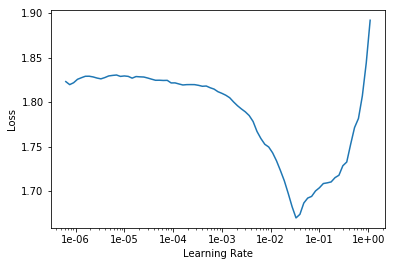

In [14]:
learn.recorder.plot()

In [15]:
# lr = 1e-2
# moms = (0.7,0.8)
# scale = (1**4)
# cycles = 20
lr = 1e-2
moms = (0.7,0.8)
scale = (1**4)
cycles = 20

In [16]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,1.348737,1.092729,0.612083,00:10
1,1.041808,0.907472,0.680833,00:11
2,0.882042,0.846861,0.709583,00:10
3,0.817866,0.827214,0.722917,00:10
4,0.817435,0.817980,0.722500,00:10
5,0.786300,0.822913,0.727083,00:10
6,0.802459,0.822299,0.722083,00:10
7,0.693383,0.825710,0.728750,00:10
8,0.719250,0.782435,0.742500,00:10
9,0.702575,0.763285,0.753333,00:10


In [17]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.435011,0.828964,0.757917,00:10
1,0.441848,0.846278,0.761250,00:11
2,0.467947,0.859951,0.756250,00:10
3,0.483468,0.825832,0.760833,00:09
4,0.539885,0.827495,0.760833,00:10
5,0.549852,0.819346,0.751667,00:09
6,0.544445,0.831277,0.756250,00:11
7,0.532409,0.857093,0.751250,00:10
8,0.498867,0.863802,0.748333,00:10
9,0.478565,0.855843,0.761667,00:10


In [17]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.448901,1.848607,0.622500,00:12
1,0.451448,1.935387,0.619444,00:11
2,0.502471,1.892720,0.615833,00:11
3,0.491539,1.867887,0.611667,00:12
4,0.549414,1.709892,0.623889,00:11
5,0.588179,1.675335,0.612222,00:11
6,0.583970,1.672935,0.631111,00:11
7,0.552800,1.720846,0.616667,00:12
8,0.587069,1.625810,0.622222,00:11
9,0.541057,1.781037,0.604722,00:12


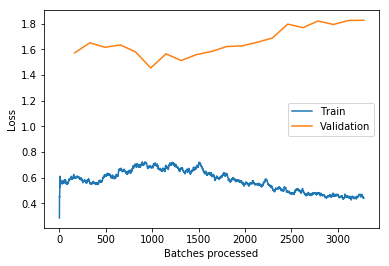

In [16]:
learn.recorder.plot_losses()

In [18]:
learn.save('2020_03_20_sep_ff_only')

In [340]:
learn.freeze_to(-2)

In [341]:
learn.fit_one_cycle(cycles, slice((lr/2)/scale,(lr/2)), moms=moms)
#learn.fit_one_cycle(5, slice(5e-3/(2.6**4),5e-3), moms=(0.2,0.1))

epoch,train_loss,valid_loss,accuracy,time
0,1.302489,1.210643,0.608889,00:11
1,1.147067,1.205897,0.625079,00:11
2,1.043286,1.198088,0.634921,00:12
3,0.959284,1.212335,0.638730,00:11
4,0.937127,1.237250,0.638095,00:11


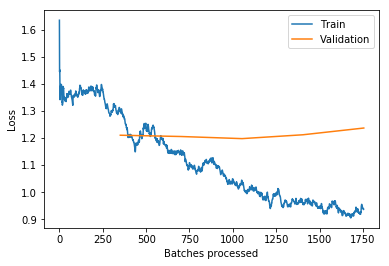

In [342]:
learn.recorder.plot_losses()

In [343]:
learn.freeze_to(-3)
#learn.fit_one_cycle(5, slice(1e-4 / (2.6 ** 4), 1e-4), moms=(0.2, 0.1))
learn.fit_one_cycle(cycles, slice((lr/10)/scale,(lr/10)), moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.895113,1.222485,0.637778,00:17
1,0.889085,1.226429,0.636825,00:18
2,0.881259,1.236015,0.634286,00:20
3,0.881231,1.257907,0.636190,00:17
4,0.855727,1.272891,0.634286,00:18


In [25]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(5e-5 / (2.6 ** 4), 5e-5), moms=(0.2, 0.1))

In [19]:
    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`"
        x=torch.arange(0,data.c)
        cm = ((self.pred_class==x[:,None]) & (self.y_true==x[:,None,None])).sum(2)
        return cm.cpu().numpy()

    def plot_confusion_matrix(self, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = self.confusion_matrix()
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, self.data.classes, rotation=45)
        plt.yticks(tick_marks, self.data.classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [20]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

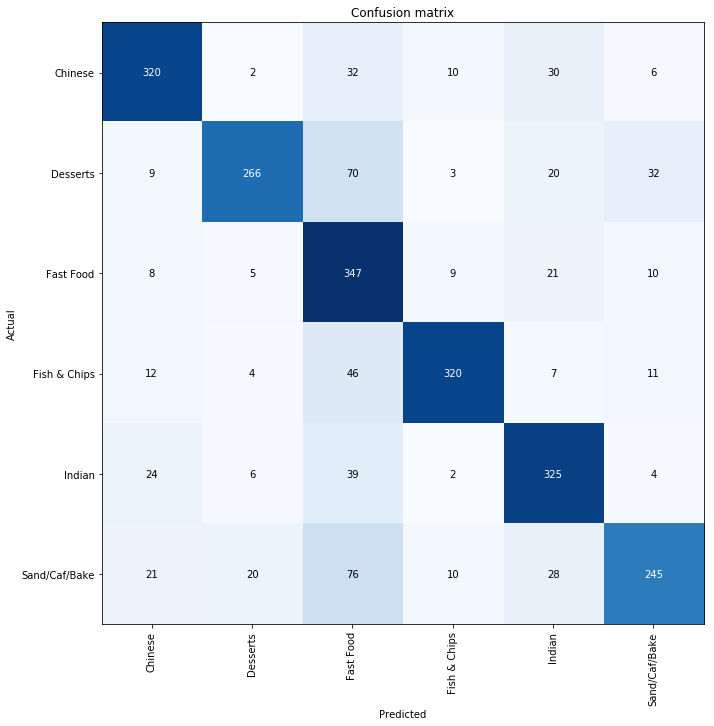

In [21]:
interp.plot_confusion_matrix(figsize=(10,10))

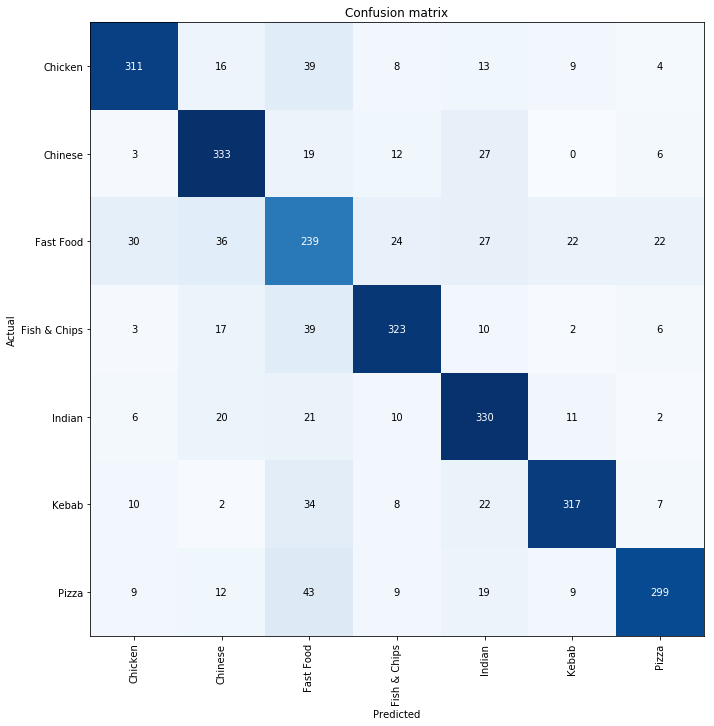

In [158]:
interp.plot_confusion_matrix(figsize=(10,10))

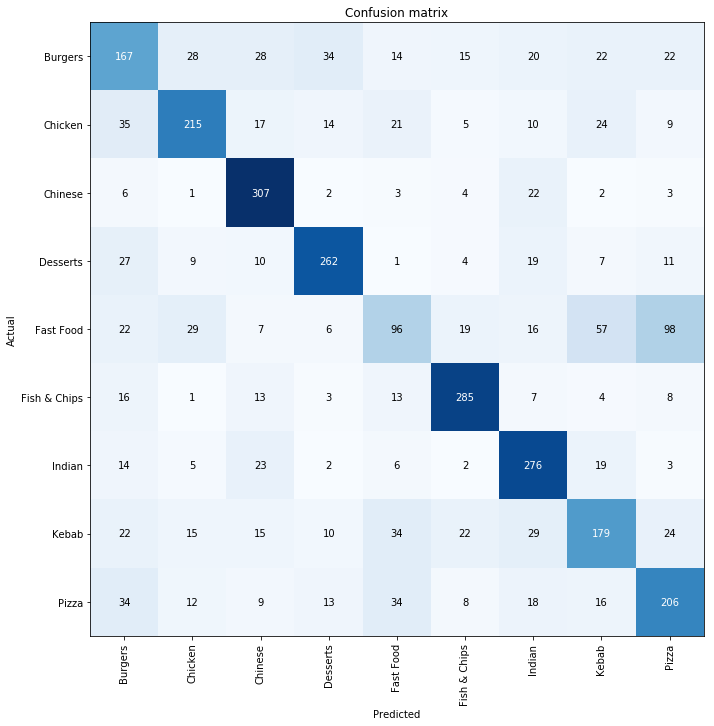

In [350]:
interp.plot_confusion_matrix(figsize=(10,10))

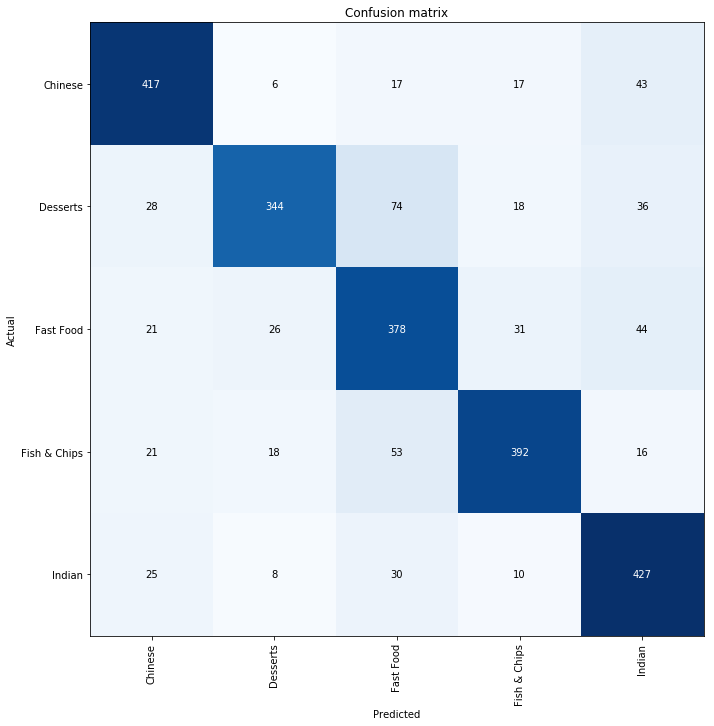

In [27]:
interp.plot_confusion_matrix(figsize=(10,10))

In [35]:
#txt_ci = TextClassificationInterpretation.from_learner(learn)
interp2 = TextClassificationInterpretation(learn, *learn.get_preds(with_loss=True, ordered=True))

In [36]:
#txt_ci.show_top_losses(20)
blah = interp2.show_top_losses(10000)


Text,Prediction,Actual,Loss,Probability
xxbos d o l c e,Fish & Chips,Desserts,13.64,0.00
xxbos m a m a s,Fast Food,Desserts,13.42,0.00
xxbos y u m m y t u m m y,Chinese,Sand/Caf/Bake,13.08,0.00
xxbos k i n g k o n e,Chinese,Desserts,13.03,0.00
xxbos m a m m a m i a ' s,Fast Food,Desserts,12.94,0.00
xxbos m o e ' s p e r i p e r i g r i l l,Fast Food,Desserts,12.85,0.00
xxbos m o n o l o s,Fast Food,Desserts,12.30,0.00
xxbos s u g a r l u m p,Desserts,Sand/Caf/Bake,12.10,0.00
xxbos n u t t y e l l a,Fast Food,Desserts,11.98,0.00
xxbos p e r i t t o ' s p e r i p e r i,Fast Food,Desserts,11.88,0.00


In [16]:
interp2.

TextClasDataBunch;

Train: LabelList (45000 items)
x: TextList
xxbos   s o u t h e r n   f r i e d   c h i c k e n     a n d     p i z z a,xxbos   m a h a r a n i   i n d i a n   c u i s i n e,xxbos   s w e e t   j a m r o c k,xxbos   s w e e t   j a m r o c k,xxbos   z a a f r a n
y: CategoryList
Fast Food,Indian,Fast Food,Fast Food,Indian
Path: .;

Valid: LabelList (3600 items)
x: TextList
xxbos   j     a n d     d   k e b a b,xxbos   v a r i e t y s   t a k e a w a y,xxbos   h o t   e x p r e s s,xxbos   f a m i l y   k e b a b     a n d     p i z z a r i a,xxbos   s u r f     a n d     t u r f
y: CategoryList
Kebab,Fast Food,Kebab,Fast Food,Fast Food
Path: .;

Test: None

In [37]:
my_top_losses = interp2.top_losses()
my_ds = interp2.data.dl('Valid').dataset
my_classes = interp2.data.valid_ds.classes
my_preds_class = interp2.pred_class
tl_val,tl_idx = my_top_losses


items = []
for idx in tl_idx:
    tx,cl = interp2.data.valid_ds[idx]
    cl = cl.data
    txt =  ' '.join([''.join(i.split()) for i in re.split(r' {2,}',tx.text)])[6:]
    tmp = [txt, f'{my_classes[my_preds_class[idx]]}', f'{my_classes[cl]}']
    items.append(tmp)
items = np.array(items)
names = ['Text', 'Prediction', 'Actual']
df = pd.DataFrame({n:items[:,i] for i,n in enumerate(names)}, columns=names)

In [167]:
df.to_csv('13_01_2020_errors.csv', index=False)

In [39]:
cm = interp2.confusion_matrix()

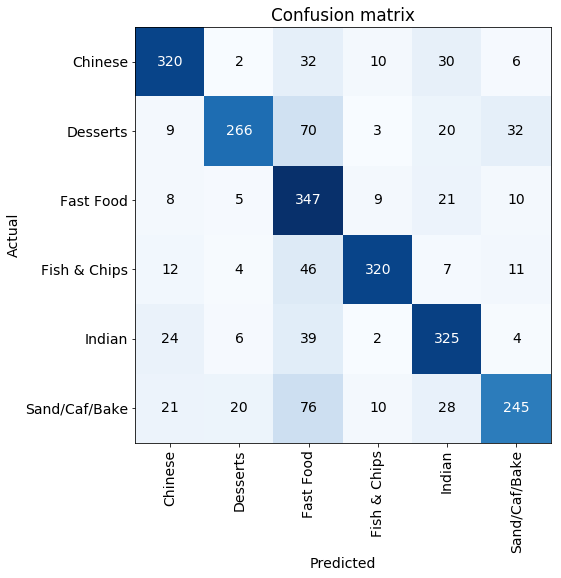

In [40]:
plt.rcParams.update({'font.size': 14})
interp2.plot_confusion_matrix(figsize=(8,8))

In [41]:
#Precision = tp / tp + fp
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [42]:
recall

array([0.8   , 0.665 , 0.8675, 0.8   , 0.8125, 0.6125])

In [43]:
precision

array([0.812183, 0.877888, 0.568852, 0.903955, 0.75406 , 0.795455])

In [44]:
precision.mean()

0.7853987769087402

In [45]:
recall.mean()

0.7595833333333334

In [23]:
learn.predict("mamoods mirch")

(Category Desserts,
 tensor(2),
 tensor([0.1397, 0.0117, 0.3502, 0.1343, 0.0332, 0.0265, 0.0559, 0.1784, 0.0701]))

In [24]:
learn.predict("fryer tuck")

(Category Fish & Chips,
 tensor(4),
 tensor([3.3629e-07, 1.2309e-03, 3.5925e-06, 8.1342e-04, 9.9777e-01, 9.5526e-05,
         4.4523e-06, 3.9081e-05, 4.0542e-05]))

In [25]:
learn.predict("jade garden")

(Category Chinese,
 tensor(1),
 tensor([2.3990e-07, 9.9865e-01, 2.2686e-07, 2.7119e-04, 5.1614e-05, 9.7042e-04,
         1.6681e-06, 3.7176e-05, 1.4342e-05]))

In [22]:
learn.predict("jerk house")

(Category Fast Food,
 tensor(2),
 tensor([0.2168, 0.0406, 0.6402, 0.0161, 0.0781, 0.0083]))

In [23]:
learn.predict("abra kebabra")

(Category Fast Food,
 tensor(2),
 tensor([2.4363e-05, 9.9402e-07, 9.9972e-01, 2.5463e-07, 2.4918e-04, 2.0597e-07]))

In [24]:
learn.predict("mcdoner")

(Category Fast Food,
 tensor(2),
 tensor([3.2807e-03, 5.0873e-04, 9.7921e-01, 6.8078e-03, 9.9109e-03, 2.7945e-04]))

In [25]:
learn.predict("southern fried rooster")

(Category Fast Food,
 tensor(2),
 tensor([1.2324e-02, 4.9889e-04, 9.6919e-01, 4.4617e-03, 1.1890e-02, 1.6323e-03]))

In [26]:
learn.predict("luigis pizza parlour")

(Category Fast Food,
 tensor(2),
 tensor([1.8512e-04, 1.0966e-05, 9.9935e-01, 4.0324e-05, 3.8692e-04, 2.2607e-05]))

In [27]:
learn.predict("mrs boggins sandwich shop")

(Category Sand/Caf/Bake,
 tensor(5),
 tensor([1.2056e-05, 4.1230e-05, 2.2578e-04, 1.1115e-05, 3.0048e-06, 9.9971e-01]))

In [28]:
learn.predict("codfather")

(Category Fish & Chips,
 tensor(3),
 tensor([5.8303e-05, 7.2931e-06, 5.3680e-03, 9.9445e-01, 4.3550e-05, 7.2614e-05]))

In [29]:
learn.predict("top chef")

(Category Chinese,
 tensor(0),
 tensor([7.6555e-01, 1.6182e-03, 1.3469e-01, 5.7949e-03, 9.1621e-02, 7.2157e-04]))

In [30]:
learn.predict("doner cha want me")

(Category Indian,
 tensor(4),
 tensor([0.1948, 0.0015, 0.3805, 0.0207, 0.3818, 0.0207]))

In [31]:
learn.predict("kebabs r us")

(Category Fast Food,
 tensor(2),
 tensor([3.2910e-05, 6.0077e-08, 9.9990e-01, 9.7345e-08, 6.6743e-05, 2.0561e-07]))

In [32]:
learn.predict("sapna")

(Category Indian,
 tensor(4),
 tensor([2.1046e-02, 7.7136e-05, 2.6818e-01, 1.6395e-03, 7.0792e-01, 1.1401e-03]))

In [33]:
learn.predict("cocum")

(Category Indian,
 tensor(4),
 tensor([1.2241e-02, 2.1769e-04, 9.6867e-02, 6.4483e-04, 8.8962e-01, 4.1378e-04]))

In [34]:
learn.predict("uncle sam")

(Category Fast Food,
 tensor(2),
 tensor([0.0388, 0.1145, 0.4139, 0.1552, 0.2734, 0.0042]))